<a href="https://colab.research.google.com/github/juninhoisrael/AlbumCopa2022/blob/main/Projeto_%C3%81lbum_de_Figurinhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## **PROJETO: Album Copa do Mundo 2022**
- Total de cromos: **670**.
- Preço do livro ilustrado capa brochura: **R\$ 12,00**.
- Envelope com 5 cromos: **R\$ 4,00**.


![Imagem albúm de figurinhas](https://www.showmetech.com.br/wp-content/uploads//2022/08/Design-sem-nome-73.png)


### **SUPOSIÇOES**
1. Todas as figurinhas tem igual probabilidade de serem sorteadas;
2. Um pacotinho é comprado por vez até que se complete o album.  



### **PERGUNTAS**
1. Qual o valor medio investido para completar o album nessas condiçoes?
2. Quantos pacotes sao necessarios comprar, em media, para completar o album?
3. Quantas vezes saiu a figurinha mais repetida, em media?
4. Em média, quantas figurinhas não se repetem ao completar o album?
5. Qual é a distribuiçao empirica do valor investido para completar o album?
6. Qual a probabilidade de se gastar menos que R\$3000,00 para completar o album?
7. Qual a probabilidade de se gastar mais do que a media para completar o album?
8. Qual e um intervalo de confiança de 95% para o gasto ao se completar o album?
9. Qual o valor medio gasto caso se esteja completando o album com mais um amigo? 
10. Qual o valor medio gasto caso se esteja completando o album com mais dois amigos? 
11. Grafico da custo medio em funçao da quantidade de pessoas trocando figurinhas. 

In [1]:
n_album = 670
preco_pacote = 4
cromos_por_pacote = 5
preco_album = 12 
simulacoes = 1000

In [2]:
import numpy as np
from random import randint

# representação do álbum
album = np.zeros(n_album) 

# representação do pacote de figurinhas
pacotinho = np.random.choice(range(n_album), cromos_por_pacote)
pacotinho

# 'colando' as figurinhas obtidas no álbum
for i in pacotinho:
    album[i] += 1

In [3]:
# comprando figurinhas até completar o álbum
def SimulaAlbum():
    album = np.zeros(n_album) 
    pacotes = 0
    while not np.all(album > 0):
        pacotinho = np.random.choice(range(n_album), 5)
        pacotes += 1

        for i in pacotinho:
            album[i] += 1
 

    valor_gasto = preco_album + preco_pacote * pacotes 

    mais_repetida = max(album)

    nao_repetidas = sum(album == 1)

    # print(album)
    return valor_gasto, mais_repetida, nao_repetidas

SimulaAlbum()

(4396, 18.0, 1)

In [4]:
valores = []
maisrep = []
nao_rep = []

for i in range(simulacoes):

    s1, s2, s3 = SimulaAlbum()

    valores.append(s1)
    maisrep.append(s2)
    nao_rep.append(s3)

    if (i+1) % 100 == 0:
        print('Simulação:', i+1, '/', simulacoes)

Simulação: 100 / 1000
Simulação: 200 / 1000
Simulação: 300 / 1000
Simulação: 400 / 1000
Simulação: 500 / 1000
Simulação: 600 / 1000
Simulação: 700 / 1000
Simulação: 800 / 1000
Simulação: 900 / 1000
Simulação: 1000 / 1000


In [5]:
#questões 1 e 2
print('O valor médio gasto foi:', round(np.mean(valores), 2))
print('O numero de pacotes médio foi:', round((np.mean(valores) - preco_album)/preco_pacote, 2))

O valor médio gasto foi: 3786.75
O numero de pacotes médio foi: 943.69


In [6]:
#Questão 3
np.mean(maisrep)

16.572

In [7]:
#Questão 4
np.mean(nao_rep)

7.307

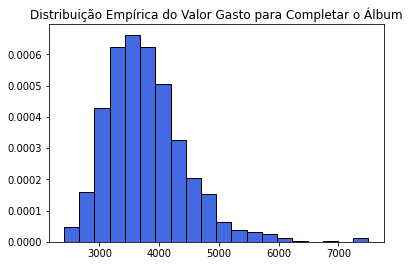

In [9]:
#questão 5
import matplotlib.pyplot as plt
plt.hist(valores, bins = 20, density = True, color = 'royalblue', edgecolor = 'black')
plt.title('Distribuição Empírica do Valor Gasto para Completar o Álbum')
plt.show()

In [10]:
# questoes 6 e 7
 
prob1 = sum(np.array(valores) < 3000)/simulacoes
prob2 = sum(np.array(valores) > np.array(valores).mean())/simulacoes
 
print('A probabilidade de se gastar menos de 3000 é {:.2f}%'.format(prob1*100))
print('A probabilidade de se gastar mais do que a média é {:.2f}%'.format(prob2*100))

A probabilidade de se gastar menos de 3000 é 7.10%
A probabilidade de se gastar mais do que a média é 44.90%


In [11]:
# questao 8

qts = np.quantile(valores, [0.025, 0.975])
print('O intervalo de confiança de 95% para o gasto total é ({:.2f}, {:.2f})'.format(qts[0], qts[1]))

O intervalo de confiança de 95% para o gasto total é (2779.90, 5361.30)


### **Trocar figurinhas pode ser mais barato?**

In [12]:
# comprando figurinhas até completar o álbum
def SimulaAlbum(qtde_albuns = 1):
    album = np.zeros(n_album) 
    pacotes = 0
    while not np.all(album >= qtde_albuns):
        pacotinho = np.random.choice(range(n_album), 5)
        pacotes += 1

        for i in pacotinho:
            album[i] += 1
 

    valor_gasto = qtde_albuns*preco_album + preco_pacote * pacotes 
    valor_gasto_por_album = valor_gasto/qtde_albuns

    return valor_gasto, pacotes, valor_gasto_por_album

SimulaAlbum(2)

(6688, 1666, 3344.0)

In [13]:
def Simulacao(qtde_albuns, simulacoes = 1000, silencio = False):
    valores = []
    for i in range(simulacoes):
        valores.append(SimulaAlbum(qtde_albuns)[2])
        if not silencio:
            if (i+1) % 10 == 0:
                print('Simulação: ', i+1, '/', simulacoes)
    return valores

sim = Simulacao(qtde_albuns = 2, simulacoes = 100)

Simulação:  100 / 100


In [14]:
# questões 9 e 10

sim2 = Simulacao(2, 100, silencio = True) 
c2 = np.array(sim2).mean() 

sim3 = Simulacao(3, 100, silencio = True) 
c3 = np.array(sim3).mean()  

print('Custo médio entre 2 amigos:', round(c2, 2) )
print('Custo médio entre 3 amigos:', round(c3, 2) )

Custo médio entre 2 amigos: 2534.38
Custo médio entre 3 amigos: 2041.07


In [17]:
import time
def SimulacaoAmigos(amigos = 40, simulacoes = 10):
    medias = []
    amigos = list(range(1, amigos + 1, 1))
    for i in amigos: 
        t = time.time()
        aux = Simulacao(i, simulacoes, silencio = True)
        tempo = round(time.time() - t, 2)
        print('Tempo total de {}s para a simulação com {} amigo(s)'.format(tempo, i))
        medias.append(np.array(aux).mean())
    return amigos, medias

sim_amigos = SimulacaoAmigos(amigos = 20, simulacoes = 100)

Tempo total de 10.33s para a simulação com 1 amigo(s)
Tempo total de 12.23s para a simulação com 2 amigo(s)
Tempo total de 14.19s para a simulação com 3 amigo(s)
Tempo total de 16.27s para a simulação com 4 amigo(s)
Tempo total de 19.28s para a simulação com 5 amigo(s)
Tempo total de 20.74s para a simulação com 6 amigo(s)
Tempo total de 22.49s para a simulação com 7 amigo(s)
Tempo total de 24.67s para a simulação com 8 amigo(s)
Tempo total de 25.99s para a simulação com 9 amigo(s)
Tempo total de 28.99s para a simulação com 10 amigo(s)
Tempo total de 31.38s para a simulação com 11 amigo(s)
Tempo total de 32.31s para a simulação com 12 amigo(s)
Tempo total de 34.55s para a simulação com 13 amigo(s)
Tempo total de 35.49s para a simulação com 14 amigo(s)
Tempo total de 37.72s para a simulação com 15 amigo(s)
Tempo total de 39.51s para a simulação com 16 amigo(s)
Tempo total de 42.65s para a simulação com 17 amigo(s)
Tempo total de 42.93s para a simulação com 18 amigo(s)
Tempo total de 44.9

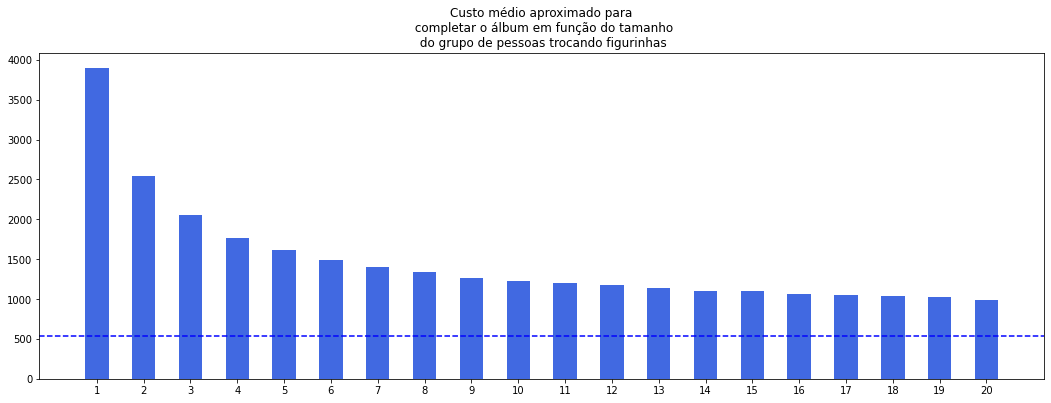

In [18]:
import math
def GraficoCustoAmigos(simulacao):

    minimo_possivel = math.ceil(n_album/cromos_por_pacote)*preco_pacote 

    plt.figure(figsize=(18, 6))
    plt.bar(simulacao[0], simulacao[1], width = 0.5, color = 'royalblue')
    plt.xticks(simulacao[0])
    plt.axhline(y = minimo_possivel, linestyle = 'dashed', color = 'blue')
    plt.title('Custo médio aproximado para\n completar o álbum em função do tamanho\n do grupo de pessoas trocando figurinhas')
    plt.show()

GraficoCustoAmigos(sim_amigos)

In [20]:
sim4 = Simulacao(20, 100, silencio = True) 
c20 = np.array(sim4).mean()  

print('Custo médio entre 20 amigos:', round(c20, 2) )

Custo médio entre 20 amigos: 1000.16


---

O **custo medio** para preencher o album de figurinhas da copa do mundo de 2022 é de **3786,00**. Sendo que uma pessoa tem apenas **7%** de chances de completar esse album sozinha gastando menos de 3000,00.
Caso preencha o album com um amigo ( trocando as figurinhas repetidas) esse valor cai para **2534,00** e se aproxima de **1000,00** caso a troca seja feita com 20 pessoas.
 O valor do algoritmo esta bem proximo do valor teorico divulgado pela Exame: https://exame.com/conta-em-dia/economizar/completar-album-copa-mundo-2022-gastando-pouco/
 que divulgou o valor do custo médio e com um amigo em 3797,00 e 2.524 respectivamente.

Em um cenário perfeito em que, ao comprar pacotinhos de figurinhas, não apareça figuirinhas repetidas o menor valor é de 548 reais. ( valor mínimo possível).
 Podemos perceber que preencher albúms trocando figurinhas com outros colecionadores, o custo médio diminui. E à medida que o número de pessoas trocando figurinhas aumenta, esse número tende a se aproximar do valor mínimo de 548,00.

---